# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

#print data


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,5181,22044,21531,1740,7353,4985
2,16448,6243,6360,824,2662,2005


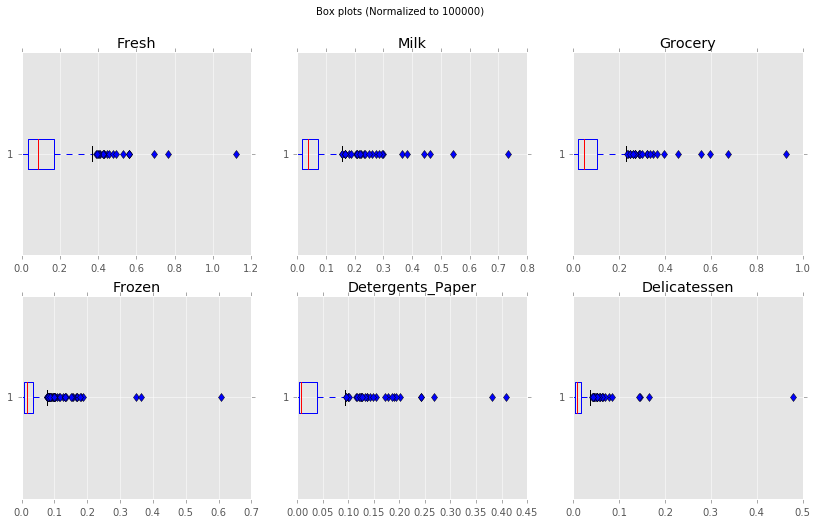

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
import matplotlib.pyplot as plt
plt.style.use('ggplot');
indices = [3,45,300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
# Draw the box plots for the products
# Create a 3 x 2 fig matrix
nrows=2;
ncols=3;
normFactor=1e5;
fig,ax= plt.subplots(nrows=nrows, ncols=ncols,figsize = (14,8))
fig.suptitle('Box plots (Normalized to %d)\n' %normFactor); # \n gives some space. suptitle is the super title of the figure
products=list(data.columns);


products=np.array(products).reshape(2,3);
for i in range(nrows):
    for j in range(ncols):
        ax[i,j].boxplot(data[products[i][j]]*1.0/normFactor,vert=False,sym='d'); # sym is the symbol for outliers
        ax[i,j].set_title('%s'%products[i][j]);
        


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [4]:
# From the reviewer feedback (Thanks !)

# Get the percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3) # Computes the rank, 
print pcts



     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3     67.7  18.8     46.6    88.0              40.7          74.8
45    34.8  96.8     93.0    53.6              89.8          95.7
300   74.1  69.1     58.9    28.1              68.0          78.4


**Answer:**  Based on the overall spending stats: Customer (3) spending on Fresh, Frozen, and Delicatessen are more than the average spending while others are below. The percentile ranks are above 50% percentiles. This indicates that the customer could be a resturant/deli shop. 

Customer (45) has higher spending amounts for milk, grocery,Delicatessen and Detergents_Paper, more than 75% percentile for these elements.  From above percentile rank it iterates the fact that, these products have high rank, i.e about >=90% of oberservations are below the spending habits of customer 45. This must be large retailer with lot of stores.

Customer (300) spending are mostly with in 75 percentile mark. This could be local retailer. 


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# Let's say we try to predict "Fresh", given all other features. 

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score

new_data=data; # make a copy of the data; though it is unnecessary

features_set= list(new_data.columns) # Convert into a list
print features_set
#features_set=[s.decode('unicode_escape').encode('ascii','ignore') for s in features_set];


# Since we are trying to predict "Fresh", all the rest of the features are dropped from the dataframe

# feature_to_predict="Milk";

for feature_to_predict in features_set:

    # Remove the element from the feature set
    # features_take=list(features_set) # Since lists are mutable, list() creates a copy (deep copy)
    # features_take.pop(features_take.index(feature_to_predict));
    #

    X_all=new_data.drop(feature_to_predict,axis=1); # Dropping 'Fresh' will give us X_all

    Y_all = new_data[feature_to_predict]; # Channels and Region has already been dropped

    # print X_all.shape, Y_all.shape

    # TODO: Split the data into training and testing sets using the given feature as the target
    # test_size=0.25 splits the training and test sets as 75% and 25% respectively
    X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.25, random_state=13);

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=13);

    regressor.fit(X_train,y_train); # Fit the model using the training data set

    y_predict=regressor.predict(X_test); # Get the predictions using test set.

    # TODO: Report the score of the prediction using the testing set
    score = r2_score(y_test,y_predict)

    print 'R^2-score for the feature {0:s}: {1:.4f}'.format(feature_to_predict,score);

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
R^2-score for the feature Fresh: -0.7867
R^2-score for the feature Milk: 0.1037
R^2-score for the feature Grocery: 0.7539
R^2-score for the feature Frozen: 0.1217
R^2-score for the feature Detergents_Paper: 0.6605
R^2-score for the feature Delicatessen: 0.1355


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** Reported prediction scores for Grocery, Detergents_Paper, Delicatessen, Frozen, Milk and Fresh are : 0.7539, 0.6605, 0.1355, 0.1217, 0.1037 and -0.7867 respectively.

Taking each feature at a time and looking at individual `R^2` scores it looks like feature Fresh fails to fit the data (since `R^2` are negative).

Remaining features have a `R^2` score that is positive between 0 and 1. This indicates that features such as Milk, Grocery, Detergents_Paper,Frozen and Delicatessen can predicted (some what) by expressing them as the combination (polynomial equation) of one of the other features. 

For instance amounts of Milk, Detergents_Paper, Frozen and Delicatessen can be proportional to amounts of Grocery a customer spends. Whereas features such as Fresh cannot be expressed as combination of other features, so this feature is necessary for identifying the customer.

Based on these observations from `R^2` score we see that the feature Fresh is necessary for indentifying customer habits as it cannot is expressed in terms of other features. 

Clearly Grocery has high `R^2` value and if this feature is to be dropped, then it could be predicted from the remaining features. A similar observation holds for `Detergent_Paper`.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

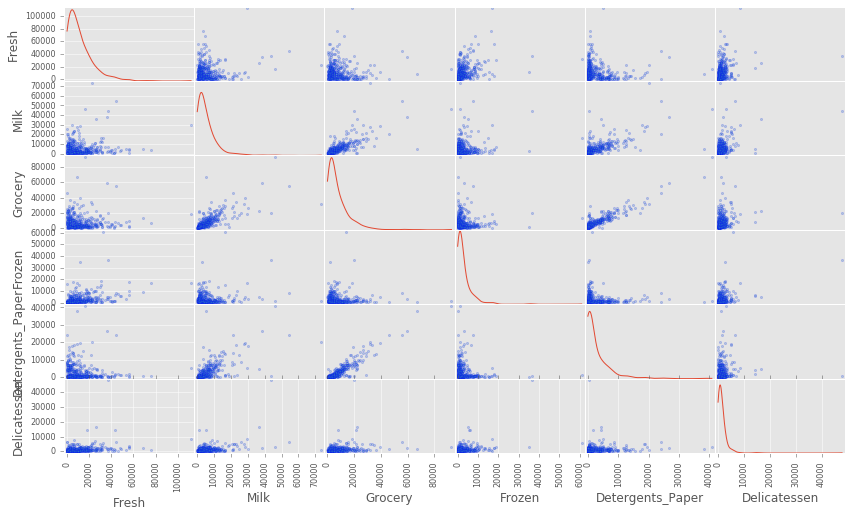

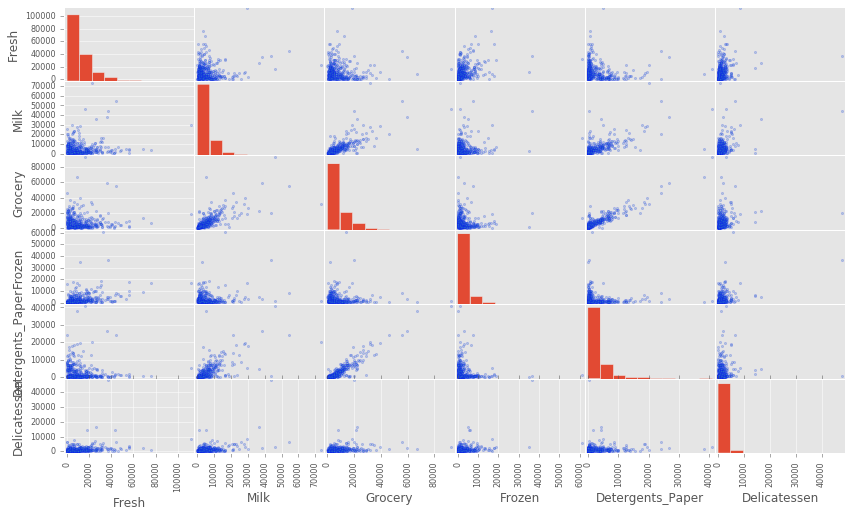

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, color='b', alpha = 0.3,  figsize = (14,8), diagonal = 'kde'); # Diagonal kde means Kernal density estimation plot
# We can also use histogram for the diagonal elements instead of kde
pd.scatter_matrix(data, color='b', alpha = 0.3,  figsize = (14,8), diagonal = 'hist');



### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** From the above scatter plots, in the first row of pictures we see that the feature "Fresh" does not exhibit any correlation with other features. In this set of scatter plots (first row) all the data points are kind of grouped together near to the origin. The first diagonal plot (first figure) (1,1) is the density estimation plot for the feature "Fresh".  Clearly the data for this feature is not normally distributed, infact this distribution is more like Rayleigh. It also indicates the data is skewed to the right (long tail to the right side of the mean). Also we can see this from the box-plots.

From the scatter plots, Grocery seems to exhibit some sort of correlation with Milk and Detergents_Paper. The scatter plots for Grocery vs Milk and Grocery vs. Detergents_Paper seem to linear. In other words Milk and Detergents_Paper can be expressed in terms of Grocery. However, from scatter-plots there is not much correlation between Frozen and Delicatseen. 

From answer to the question 2 we see that 5 out 6 features can be fitted based on the `R^2`. This some what agrees with the observations from the scatter plots that "Fresh" feature does not exhibit any correlation with other features and hence cannot be expressed as the linear combination of other features.

Looking at the diagonal plots which are the estimation of density functions, we see that they are not normally distributed. All the diagonal plots exhibit skewness towards the right. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

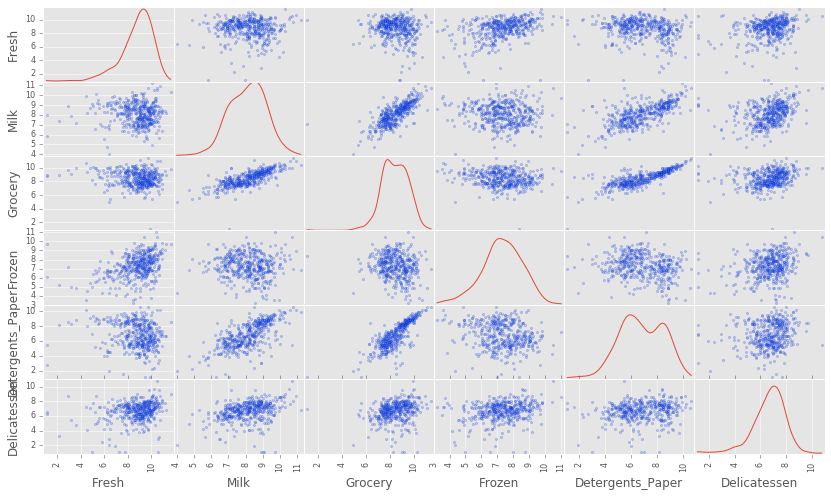

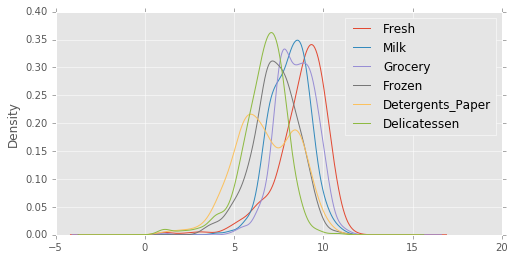

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data);

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples);

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, color='b',alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# From reviewer comments (Thanks !)
plt.figure(figsize=(8,4))
for col in data.columns:
    log_data[col].plot.kde()
plt.legend();


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.552753,10.000796,9.977249,7.461640,8.902864,8.514189
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
from collections import Counter
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    
    Q1 = np.percentile(log_data[feature],25,axis=0);
    
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75,axis=0);
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR=Q3-Q1; # This is the inter-quartile range
    step = 1.5*(Q3-Q1); # Based on John Tukey's method, it can be 1.5 or 3 (which is more conservative)
    
    # Display the outliers
    print 'Q1 and Q3 scores for the feature {0:s} are {1:2.2f} and {2:2.2f} respectively'.format(feature,Q1,Q3)
    print "Data points considered outliers for the feature '{}':".format(feature)
    
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_for_feature= list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    # append only the indices that are already not part of outliers
    
    outliers.extend(outliers_for_feature) # .extend adds the individual items of list instead of adding(appending) entire list
    
# Remove the outliers, if any were specified
counter_dict= dict(Counter(outliers)) # Counts how many times each index has appeared as the outlier for every feature.

# Key is the index of the data and value is  number of times it appears as outliers
count_outlier_df=pd.DataFrame.from_dict(counter_dict,orient='index');
count_outlier_df.columns=['Count']
display(count_outlier_df.sort_index())
# Print the outlier where the count is more than 1
print 'Outliers that are present in more than one feature'
print count_outlier_df[count_outlier_df['Count']>1]
outliers=list(set(outliers)) # set() removes any duplicate values in the list. Then convert back to list 
print 'Number of outliers for all features are {0}'.format(len(outliers));
print 'Size of original data is', log_data.shape
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print 'Sanitized data size is', good_data.shape
assert(len(set(outliers))==log_data.shape[0]-good_data.shape[0])

Q1 and Q3 scores for the feature Fresh are 8.05 and 9.74 respectively
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Q1 and Q3 scores for the feature Milk are 7.33 and 8.88 respectively
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Q1 and Q3 scores for the feature Grocery are 7.67 and 9.27 respectively
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Q1 and Q3 scores for the feature Frozen are 6.61 and 8.18 respectively
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Q1 and Q3 scores for the feature Detergents_Paper are 5.55 and 8.27 respectively
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Q1 and Q3 scores for the feature Delicatessen are 6.01 and 7.51 respectively
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


,Count
38,1
57,1
65,2
66,2
75,2
81,1
86,1
95,1
96,1
98,1


Outliers that are present in more than one feature
     Count
128      2
65       2
154      3
66       2
75       2
Number of outliers for all features are 42
Size of original data is (440, 6)
Sanitized data size is (398, 6)


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are data points that we considered as outliers for multiple features. From the table above the row with index 66 is an outlier for Fresh and Delicatessen. Similary 65 is an outlier for both frozen and fresh. There are about 5 such data points which are outliers for more than one feature. 

Outliers that are present for more than one features should be removed.

Yes, data points were added to the outliers list, since they fall outside the IQR. It is a good practice to remove the outliers from data, especially when using k-means clustering algorithm. k-means clustering algorithm is based on the principle of minimizing sum of squares. Due to the large deviation in the data point outliers get lot of weight resulting in low density clusters. Removing the outliers will improve the density of the cluster, thereby helping to properly label the data.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[-0.99858135  1.36936442 -0.28544807  0.39970721 -0.67806977 -0.61942303]
 [ 3.38536623  0.89625026 -0.98279912 -0.5093665   0.11677908  0.1185778 ]
 [ 1.38443962  0.45883459  0.50276462 -0.91541576 -0.34438558  0.35151112]]
[ 8.93343787  8.12125059  8.41863654  7.42921487  6.78751101  6.80119028]
[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [ 0.74520543 -0.15440822  0.02038937 -0.26695167  0.23485013 -0.54221164]
 [-0.26670888 -0.13749532 -0.0709773   0.71328102  0.31568384 -0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [ 0.05428877  0.51774387 -0.82668599 -0.04707807  0.20803866  0.00937317]]
Explained Varience
Dimension 1    0.4993
Dimension 2    0.2259
Dimension 3    0.1049
Dimension 4    0.0978
Dimension 5    0.0488
Dimension 6    0.0233
Name: Explained Variance, dtype: float64
Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3  

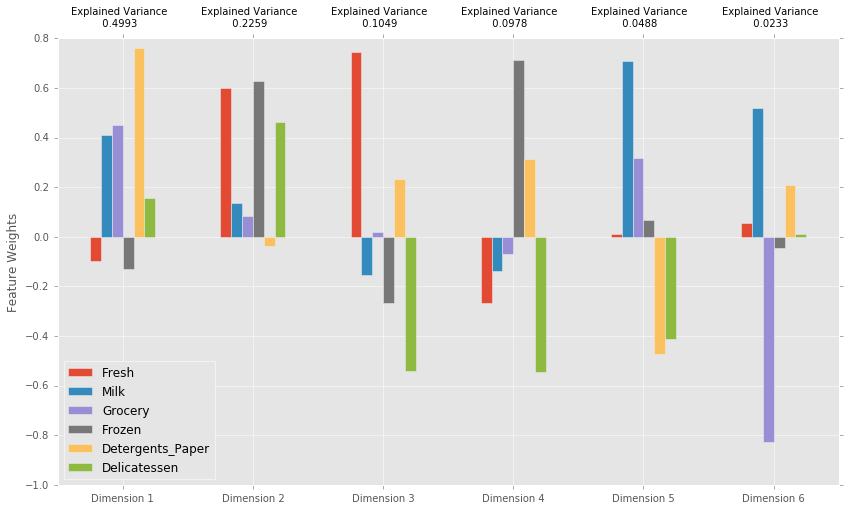

In [10]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
# n_components=min(n_samples,n_features)
# Keep all the components, so n_components=6 features
# If n_samples < n_features, then n_components are n_samples, irrespective of how much the user specifies 
# since we have 3 sample points < n_features=6, so specifying n_components=6 forces to only 3 dimensions.
pca = PCA(n_components=good_data.shape[1]); # If n_components is not specified then the default value is used
# The below statement is same as above (commented)
# pca = PCA(); 

# TODO: Apply a PCA transformation to the sample log-data
pca.fit(good_data)
pca_samples = pca.transform(log_samples);



print pca_samples
print pca.mean_
print pca.components_

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
print 'Explained Varience'
print pca_results['Explained Variance']
# Cummulative sum is the sum of all elements before that and including that element $y_k=\sum_{i=1}^{k}x_i$
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** 
Sum of first and second PC is 0.7252.

Sum of all the principal components is 1.

The first principal component (dimension) has highest variance in the data (~0.5) and the second PC has the varience in the data of about 0.23. Taking these two PC's we get about ~75% varience in the data. 
The first prinicipal component (PC1) is strongly correlated with Detergent_Paper (0.75) and to some extent with Grocery and Milk. Increase in PC1 will have high contributions to Detergents_Paper and somewhat low contributions in Milk and Grocery. Moving in this direction of PC1, we can capture the customers spending more on Detergents_Paper with some small purchases of Milk and Grocery.
The second PC (PC2) has the correlation with Frozen, Fresh and Delicatessen, i.e., an increase in this PC would increase these three features. In other words they vary together. Moving in the direction of PC2 we can get customers that spend some equal amounts of these three categories, perhaps a resturatant or a Deli shop customer.
The dimension 3 (PC3) suggests that this is primarily indicates feature Fresh. The negative values for the Delicatessen indicates that moving in the direction of PC3, indicate customer spendings primarly on Fresh but not on Delicatessen.
PC4 indicates the customers who spend primarly on Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9986,1.3694,-0.2854,0.3997,-0.6781,-0.6194
1,3.3854,0.8963,-0.9828,-0.5094,0.1168,0.1186
2,1.3844,0.4588,0.5028,-0.9154,-0.3444,0.3515


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

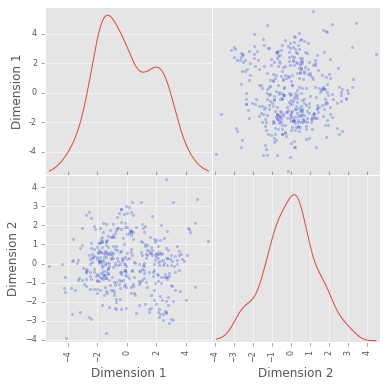

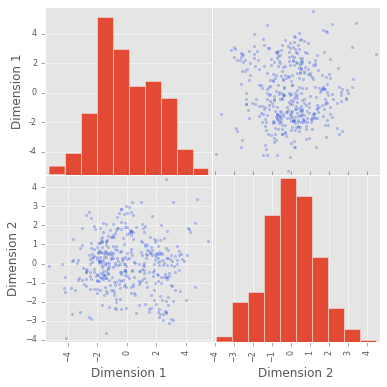

In [12]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2);

# TODO: Apply a PCA transformation the good data
pca.fit(good_data);
reduced_data = pca.transform(good_data);

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples);

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, color='b',alpha = 0.3, figsize = (6,6), diagonal = 'kde');
# Histogram for the reduced data
pd.scatter_matrix(reduced_data, color='b',alpha = 0.3, figsize = (6,6), diagonal = 'hist');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9986,1.3694
1,3.3854,0.8963
2,1.3844,0.4588


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-means is simplistic unsupervised learning algorithm, where it divides the data set into few cohesive clusters.  The main advantange of K-means is that it scales well with large number of samples (data), i.e, it is computationally faster for large data-sets. Also the clusters are disjoint.  k-means clustering algorithm is used in wide range of applications. 
Guassian Mixture Model (GMM) is a probablistic model which assume that the data points by finite Guassian distributions with unknown parameters such as mean and covarience. k-means forces the data point to belong to one particular cluster, but on the other had GMM does a "soft" assigment to the cluster. The term soft refers to the probability of the data point beloning to a particular cluster. For instance if a data point `x_i` has the probability of 0.918 for belong to a cluster `j` then it has probability of 1-0.918=0.082 that it does not belong to cluster `j`. GMM is a more generic version of the k-clusters, i.e, one can imagine k-cluster as GMM where the probabilities only take either 1 or 0 (also knows as "hard" clusters). GMM  is based on Expectation mizimization (EM) which has good properties such as (1) monotonically non-decreasing likelyhood, i.e., that a proability data point belonging to a cluster is not getting worse. (2) it may not coverege/diverse unlike k-means where you are forcing the algorithm to converse, but likehoods does not become worse  (3) It could get stuck in local optima, where a random initialization rerun would solve it. (4) It can work with any distribution (not necessarily Guassian).
Biggest advantages of GMM is it caputres the relations of the inter-dependencies in the clusters, via assigning probabilities. In other words, it will not bias the cluster sizes to have specific structures that might or might not apply (like in k-means that biases the cluster assigments).

Given our obersevations from the data, GMM seems to work better in this case. This is because we can associate certain probabilities that a particular data point belongs to a cluster (in this case a customer). Thus we can associate some confidence in the data-point and its association to the cluster. Choosing k-means does not give such a measure.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GMM(n_components=2)
clusterer.fit(reduced_data);

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
print clusterer.weights_
print 'Cluster centers (Co-ordinates in the two dimension)'
print clusterer.means_
print clusterer.covars_
print clusterer.converged_

centers = clusterer.means_

# print clusterer.score(reduced_data)

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples);

print sample_preds

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds);
print score

[ 0.5680834  0.4319166]
Cluster centers (Co-ordinates in the two dimension)
[[-1.38467291  0.05449647]
 [ 1.8212074  -0.07167713]]
[[ 1.43411417  1.56972679]
 [ 1.75362421  2.21685262]]
True
[0 1 1]
0.443601474015


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 
Clusters=2, score=0.444

Clusters=3, score=0.357

Clusters=4, score=0.292

Clsuters=5, score=0.272

Clsuters=6, score=0.307

Clsuters=7, score=0.294

Clsuters=8, score=0.324

Clsuters=9, score=0.235

Clsuters=10, score=0.263

For the several clusters tried, the silhouette score seems to higher when number of clusters is 2

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

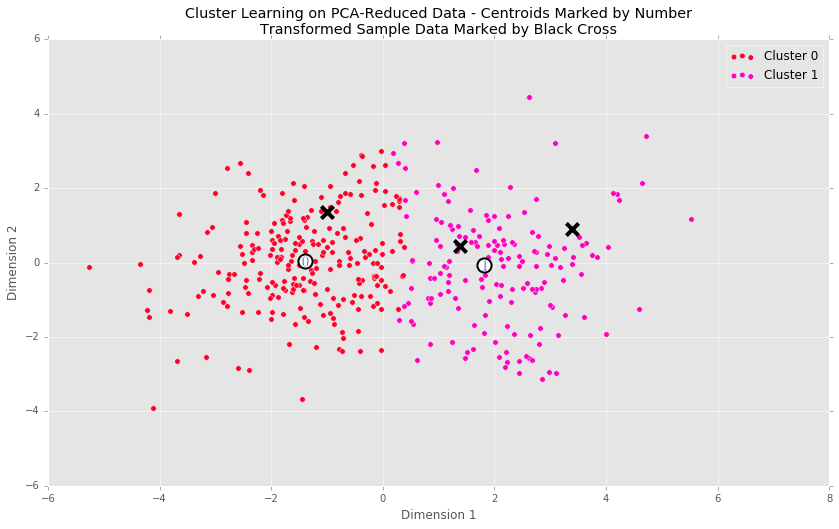

In [15]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [16]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers);

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers) # Applying anti-log to bring back the original values

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
print data.mean()

display(true_centers - data.mean().round())
print data.median()
display(true_centers - data.median().round())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3033.0,-3876.0,-5514.0,-991.0,-2572.0,-784.0
Segment 1,-5921.0,1246.0,2290.0,-1797.0,665.0,-366.0


Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,463.0,-1707.0,-2319.0,555.0,-507.0,-225.0
Segment 1,-2425.0,3415.0,5485.0,-251.0,2730.0,193.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** From the table above, which displays the mean (centers) of each product spending for a segment 0 and 1 (customers). 

Looking at the deviations of clusters centers from the mean, we see that Segment 0 has the centers that are lower than the averages for all features. Absolute difference between median and cluster center for Segment 0 is small for Fresh, Grocery and Delicatessen. From the analogy from the sample point data we see a similar observation here. Thus segment 0 could represent a resturant/cafe/hotel. 

For segment 1 the cluster center is higher than average for Milk, Grocery and Detergents_Paper. This segment could represent Groecery store. Also we can draw similar analogy from the sample point, where the percentiles for Milk, Grocery and Detergents_Paper is high. 




### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [17]:
display(samples)

# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,5181,22044,21531,1740,7353,4985
2,16448,6243,6360,824,2662,2005


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:** Sample point 0 is predicted as a hotel/cafe customer, which seems to be some what consistent with customer segment 0 in Question 8, where the Fresh, Frozen and Delicatessen cluster centers are closer to the median. 

For Sample 1, the values for 'Grocery', 'Milk', and 'Detergents_Paper' are above average and mimic the Segment 1 cluster center in those categories, and so the predicted cluster seems to be consistent with the sample.

For sample point 2 seem to be somewhat inconsisent. It's deviation from mean for Fresh is high and for Frozen and Delicatessen the spending are closer to the mean. Also milk and grocery have spending habits closer to the mean. This indicates that the Sample point 2 could be a Resturant as well a retail store.   There is probability by which this sample point can belong to either segment 0 (resturant/cafe) or segment 1 (retailer).


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** Each data point in the given set consists of customer spending and each point is now identified with a cluster based on these spendings. A particular data point can now belong to either Resturant/cafe or Retailer. Using this structure of the data we can conduct the A/B testing for two segments, taking each segment at a time, and see if the change in delivery has any affect on segment 1 or on Segment 0


Consider the segment 1 (Retailer). The question we are asking is if the change of delivery service would affect the  customer in Segment 1. Let's make an initial Hypothesis (`H_0`) that mean of the segment 1 data points remain the same, when delivery service is changed. That is `H_0`: =mean of each feature (all the means or true centers) in Segment 1. `H_A`: Alternative hypothesis is when `H_A`:~=mean of each feature (two-tailed test, mean could increase or decrease). Now if we take a random sample from segment 1 and perform a delivery change for this random sample. Clearly the mean (for all features or cluster centers) for this sample would change and they by rejecting this null hypothesis. Thus we can say that change of delivery will affect the Segment 1 customers.

On a silimar arguments if we peform the test of Segment 0 customers the test results will be more likely to accept the null-hypothesis.

Based on the test-score for each segment wholescale distributor can make a judgment on how customer would be impacted with this change of delivery schedule.


Clustering here has helped to identify that there are two particular type of customers based on their spending needs. From this structure of the data we see that retailers consume all the products almost in some high proportion compared to the resturants/cafe. So having said that changing the delivery service will not necessarily effect all customers equally.

Based on the cluster assignments for each data point, wholescale distributor can identify that changing the delivery service from 5 to 3, could affect retail consumer than a resturant/cafe/hotel consumer.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:** With the help of clustering we have assigned a label to each data point. For instance a data point can either be labelled as Resturant/Cafe/Hotel or Retailer. This new label for each data point combined with 6 other features can be part of supervisied learning analysis were the wholesale distributor want to predict a new feature.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

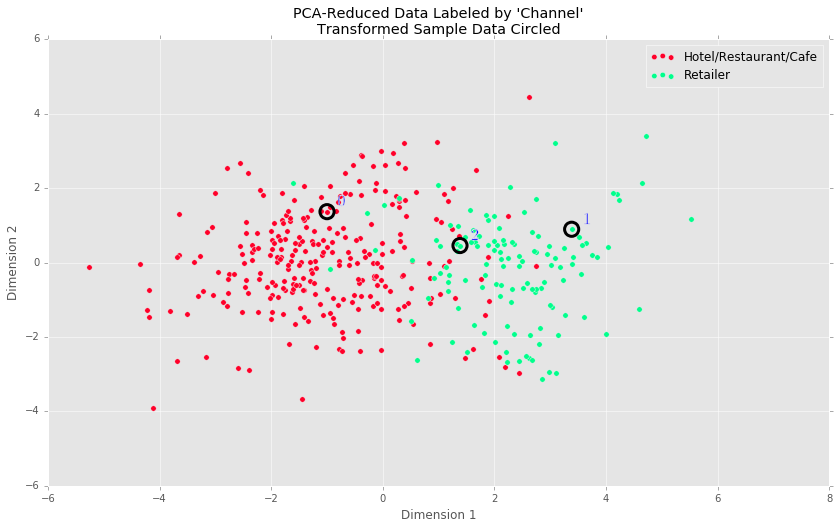

In [18]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** Clustering algorithm and the number of clusters (2 in this case) seem to work well to the underlying distribution of Hotel/Restaurant/Cafe vs Retailer customers. There are retailer (or Hotel/Restaurant/Cafe) data points which are classified as Hotel/Restaurant/Cafe (or retailer), but for most part of the data set, the clustering algorithm with 2 clusters seems to capture the underlying structure of the data.

Yes, there are customers (data-points) that can be purely classified as Retailer or Hotels/Restaurants/Cafes.

Yes, these customer segments that are purely either Retailer or Hotels/Restaurants/Cafes are consistent with the previous definition of the customer segments obtained using the clustering algorithm.

Since GMM is used here, the data point is also associated with a probability of belonging to one cluster vs other cluster.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.